### Packages Needed:

In [ ]:
!pip install imbalanced-learn

In [3]:
# Dataset: creditcard.csv
# Location: https://mitu.co.in/dataset

In [4]:
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv('/home/mitu/programs/ml/resample/creditcard.csv')

In [6]:
df.shape

(284807, 31)

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Select the input and output variables

In [9]:
x = df.drop(['Time','Class'], axis = 1)
y = df['Class']

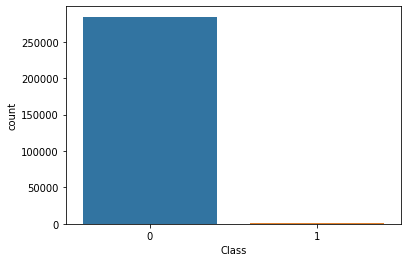

In [10]:
sns.countplot(x = y);

In [11]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Cross validation

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=0)

In [15]:
x_train.shape

(213605, 29)

In [16]:
x_test.shape

(71202, 29)

### Build the ML Model

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [18]:
y_pred = clf.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score, classification_report

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.77      0.73      0.75       120

    accuracy                           1.00     71202
   macro avg       0.88      0.87      0.87     71202
weighted avg       1.00      1.00      1.00     71202



In [21]:
accuracy_score(y_test, y_pred)

0.9991713715906857

### Under Sampling

In [23]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x_res, y_res = rus.fit_resample(x, y)

In [24]:
y_res.value_counts()

0    492
1    492
Name: Class, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_res, y_res, random_state=0)

In [27]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       119
           1       0.91      0.93      0.92       127

    accuracy                           0.92       246
   macro avg       0.92      0.92      0.92       246
weighted avg       0.92      0.92      0.92       246



### Random Over Sampling

In [30]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_res, y_res = ros.fit_resample(x, y)

In [31]:
y_res.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_res, y_res, random_state=0)

In [33]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70856
           1       1.00      1.00      1.00     71302

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



### SMOTE Over Sampling

In [36]:
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=0)
x_res, y_res = smo.fit_resample(x, y)

In [37]:
y_res.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_res, y_res, random_state=0)

In [39]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70856
           1       1.00      1.00      1.00     71302

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158

